In [6]:
import pandas as pd  
import numpy as np


In [7]:
dataset = pd.read_csv("C:/Users/MSI/Desktop/tesla_deliveries_dataset_2015_2025.csv")
dataset.head()


,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722


In [8]:
missing_values = dataset.isnull().sum()
missing_percentage = (missing_values / len(dataset)) * 100
print("Nombre de valeurs manquantes par colonne :\n", missing_values)
print("\nPourcentage de valeurs manquantes par colonne :\n", missing_percentage)


Nombre de valeurs manquantes par colonne :
 Year                    0
Month                   0
Region                  0
Model                   0
Estimated_Deliveries    0
Production_Units        0
Avg_Price_USD           0
Battery_Capacity_kWh    0
Range_km                0
CO2_Saved_tons          0
Source_Type             0
Charging_Stations       0
dtype: int64

Pourcentage de valeurs manquantes par colonne :
 Year                    0.0
Month                   0.0
Region                  0.0
Model                   0.0
Estimated_Deliveries    0.0
Production_Units        0.0
Avg_Price_USD           0.0
Battery_Capacity_kWh    0.0
Range_km                0.0
CO2_Saved_tons          0.0
Source_Type             0.0
Charging_Stations       0.0
dtype: float64


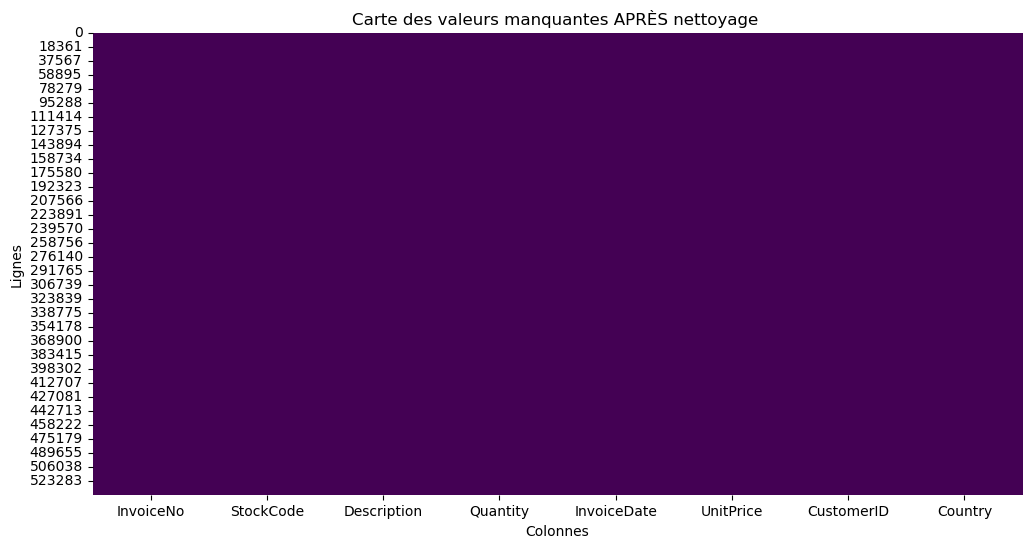

C:\Users\MSI\AppData\Local\Temp\ipykernel_20804\1323965128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cleaned.loc[:, 'TotalPrice'] = dataset_cleaned['Quantity'] * dataset_cleaned['UnitPrice']



Colonnes catégorielles : ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']
Colonnes numériques : ['Quantity', 'UnitPrice', 'CustomerID', 'TotalPrice']



Aperçu des données catégorielles :
   InvoiceNo StockCode                          Description  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1    536365     71053                  WHITE METAL LANTERN   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

           InvoiceDate         Country  
0  2010-12-01 08:26:00  United Kingdom  
1  2010-12-01 08:26:00  United Kingdom  
2  2010-12-01 08:26:00  United Kingdom  
3  2010-12-01 08:26:00  United Kingdom  
4  2010-12-01 08:26:00  United Kingdom  

Aperçu des données numériques :
    Quantity  UnitPrice  CustomerID  TotalPrice
0         6       2.55     17850.0       15.30
1         6       3.39     17850.0       20.34
2         8       2.75     17850.0       22.00
3         6       3.39     17850.0       20.34
4         6       3.39     17850.0       20.34


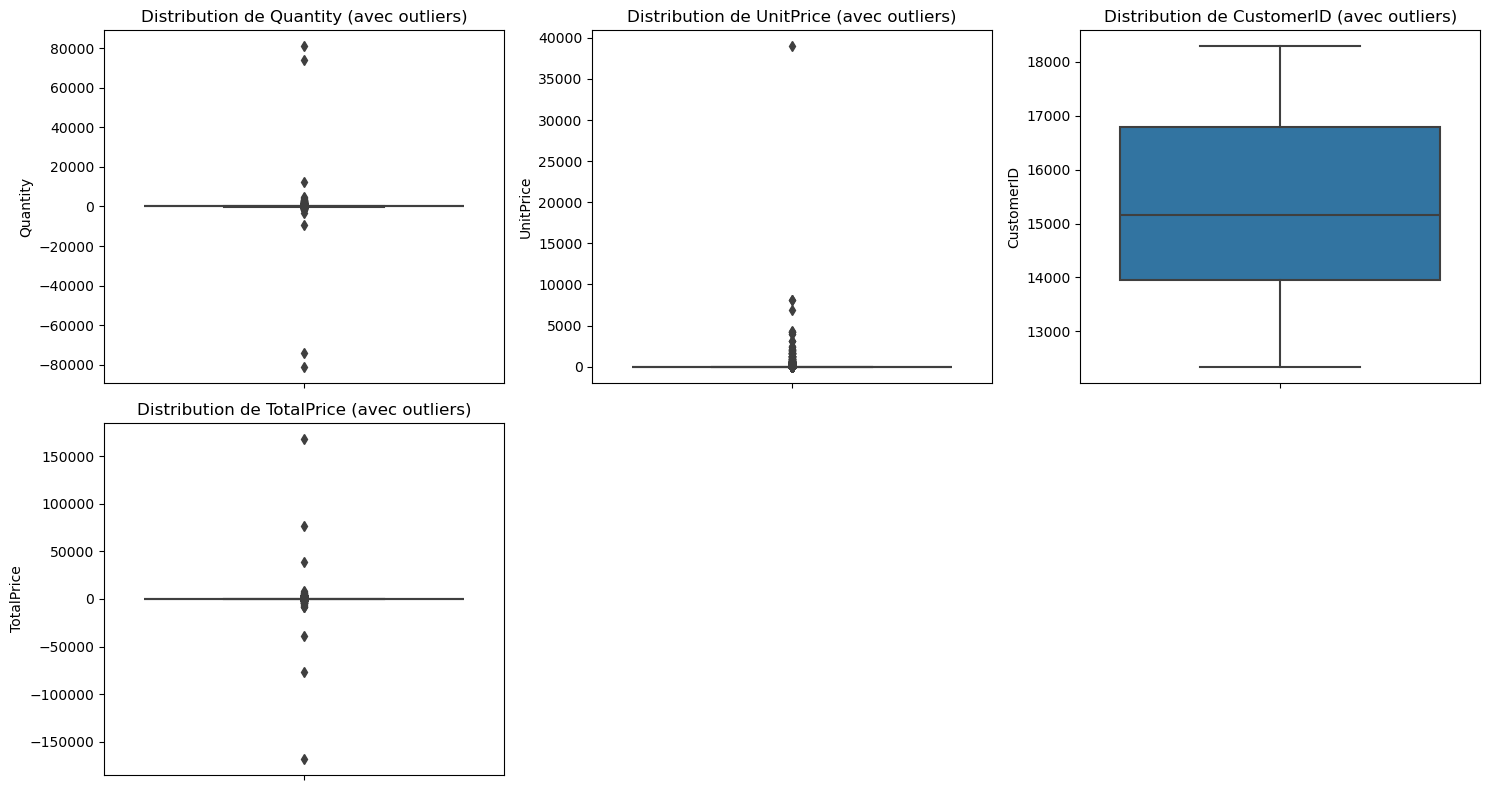

Taille du dataset avant élimination des outliers : (406829, 9)
Taille du dataset après élimination des outliers : (330007, 9)


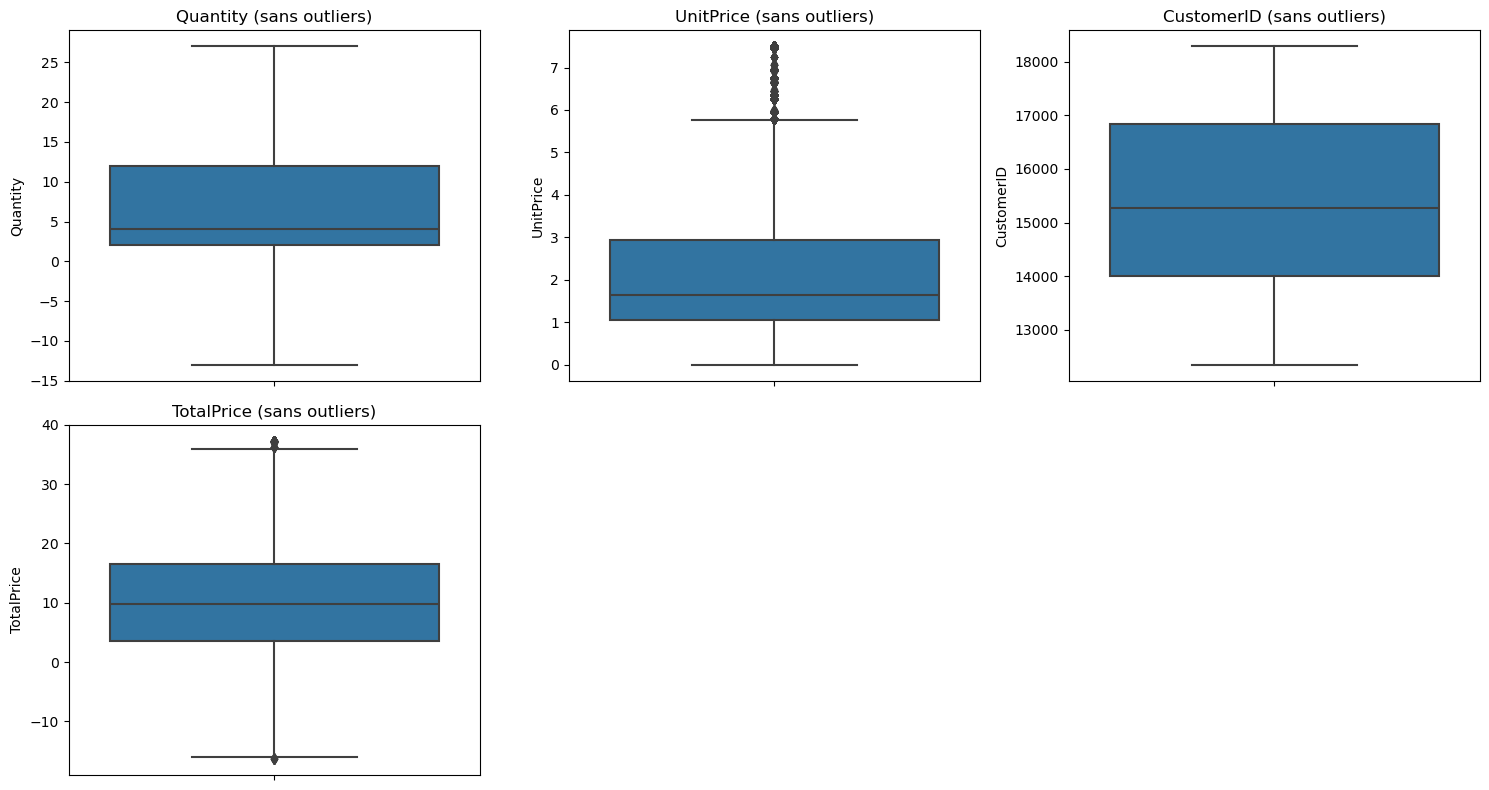

In [35]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns)//2 + 1, i)
    sns.boxplot(data=dataset_cleaned_no_outliers, y=col)
    plt.title(f'{col} (sans outliers)')

plt.tight_layout()
plt.show()


In [36]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(drop='first'), categorical_columns)
])

X_transformed = preprocessor.fit_transform(dataset_cleaned_no_outliers)
print("\nForme des données transformées :", X_transformed.shape)



Forme des données transformées : (330007, 43028)


In [37]:
features = dataset_cleaned_no_outliers[['Quantity', 'UnitPrice', 'TotalPrice']].copy()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

dataset_cleaned_no_outliers['Cluster'] = clusters


C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


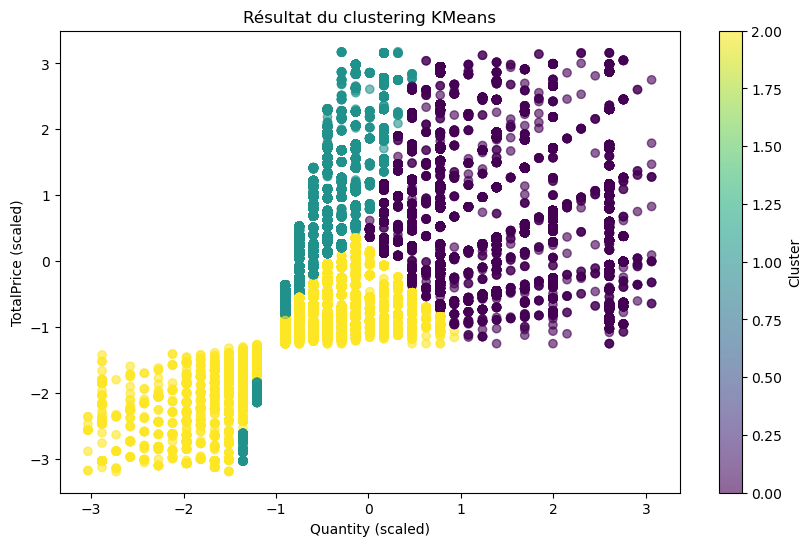

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 2], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Quantity (scaled)')
plt.ylabel('TotalPrice (scaled)')
plt.title('Résultat du clustering KMeans')
plt.colorbar(label='Cluster')
plt.show()

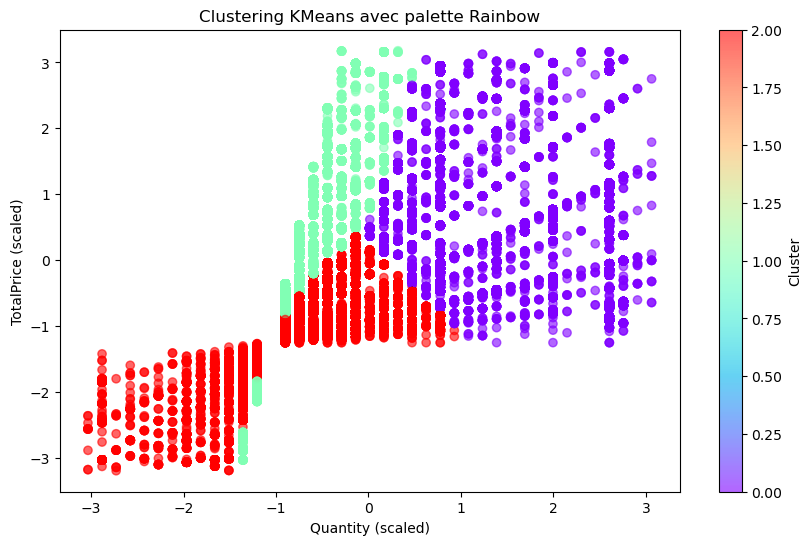

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(
    features_scaled[:, 0],   
    features_scaled[:, 2],   
    c=clusters,              
    cmap='rainbow',          
    alpha=0.6
)
plt.xlabel('Quantity (scaled)')
plt.ylabel('TotalPrice (scaled)')
plt.title('Clustering KMeans avec palette Rainbow')
plt.colorbar(label='Cluster')
plt.show()


In [41]:
print("\nRésumé des clusters :\n", dataset_cleaned_no_outliers.groupby('Cluster')[['Quantity', 'UnitPrice', 'TotalPrice']].mean())
# Cluster 0 :
# Quantité moyenne : 14.51
# Prix unitaire moyen : 1.25
# Prix total moyen : 16.28
# Ce cluster semble regrouper des produits avec une quantité relativement élevée, mais un prix unitaire relativement bas, ce qui mène à un prix total modéré.

# Cluster 1 :
# Quantité moyenne : 3.63
# Prix unitaire moyen : 4.25
# Prix total moyen : 14.20
# Ce cluster correspond à des produits de quantité plus faible, mais avec un prix unitaire plus élevé, ce qui génère un prix total assez similaire au Cluster 0 malgré la différence de quantité.

# Cluster 2 :
# Quantité moyenne : 2.66
# Prix unitaire moyen : 1.54
# Prix total moyen : 3.62
# Ce cluster regroupe des produits avec une faible quantité et un prix unitaire modéré, ce qui donne un prix total plus faible comparé aux autres clusters.

# En résumé, les trois clusters montrent une variété de comportements d'achat, allant de produits achetés en grande quantité à un prix plus bas, à des achats plus limités avec un prix unitaire plus élevé.



Résumé des clusters :
           Quantity  UnitPrice  TotalPrice
Cluster                                  
0        14.505674   1.253586   16.282840
1         3.628847   4.252796   14.195432
2         2.664057   1.541315    3.617552
